## Initialize Project

We'll initialize the project using the `HyFI.initialize` function. The function takes the following parameters:

- `project_name`: Name of the project to use.
- `project_description`: Description of the project that will be used.
- `project_root`: Root directory of the project.
- `project_workspace_name`: Name of the project's workspace directory.
- `global_hyfi_root`: Root directory of the global hyfi.
- `global_workspace_name`: Name of the global hierachical workspace directory.
- `num_workers`: Number of workers to run.
- `logging_level`: Log level for the log.
- `autotime`: Whether to automatically set time and / or keep track of run times.
- `retina`: Whether to use retina or not.
- `verbose`: Enables or disables logging

We'll check if we're running in Google Colab, and if so, we'll mount Google Drive.


In [1]:
import os
from thematos import HyFI

os.environ["HYFI_LOG_LEVEL"] = "DEBUG"

if HyFI.is_colab():
    HyFI.mount_google_drive()

project_dir = HyFI.DotEnvConfig().DOTENV_DIR

h = HyFI.initialize(
    project_name="thematos",
    project_root=project_dir,
    logging_level="INFO",
    verbose=True,
)

print("project_dir:", h.project.root_dir)
print("project_workspace_dir:", h.project.workspace_dir)


/home/yjlee/.venvs/thematos/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
INFO:hyfi.utils.notebooks:Google Colab not detected.
INFO:hyfi.utils.notebooks:Extension autotime not found. Install it first.
INFO:hyfi.joblib.joblib:initialized batcher with <hyfi.joblib.batch.batcher.Batcher object at 0x7f83042bdf40>
INFO:hyfi.main.config:HyFi project [thematos] initialized


project_dir: /raid/cis/yjlee/workspace/projects/thematos
project_workspace_dir: /raid/cis/yjlee/workspace/projects/thematos/workspace


In [2]:
from thematos.datasets import Corpus

data_file = (
    h.project.root_dir / "workspace/datasets/processed/khmer_tokenized/train.parquet"
)
data_load = {"data_file": str(data_file)}
c = Corpus(data_load=data_load, id_col="id", text_col="text")

INFO:hyfi.task.batch:Initalized batch: corpus(5) in /raid/cis/yjlee/workspace/projects/thematos/workspace/topic/corpus


In [3]:
from thematos.models import WordPrior

data_file = h.project.root_dir / "workspace/datasets/word_prior.yaml"


w = WordPrior(data_file=str(data_file), verbose=True)
w.priors


INFO:hyfi.task.batch:Initalized batch: corpus(5) in /raid/cis/yjlee/workspace/projects/thematos/workspace/topic/corpus


{0: ['bank', 'nbc', 'central'], 1: ['rates', 'interest']}

In [4]:
from thematos.models import LdaModel

lda = LdaModel(corpus=c, wordprior=w, verbose=True)
lda.model_args.k = 10

INFO:hyfi.batch.batch:Setting seed to 2563823303
INFO:hyfi.batch.batch:Init batch - Batch name: model, Batch num: 0
INFO:hyfi.batch.batch:Init batch - Batch name: model, Batch num: 2
INFO:hyfi.task.batch:Initalized batch: model(2) in /raid/cis/yjlee/workspace/projects/thematos/workspace/topic/model


In [5]:
lda.model_args.model_dump()

{'tw': 1,
 'min_cf': 5,
 'min_df': 0,
 'rm_top': 0,
 'k': 10,
 'alpha': 0.1,
 'eta': 0.01,
 '_target_': 'thematos.models.config.LdaConfig',
 '_config_name_': 'lda',
 '_config_group_': '/model/config'}

INFO:hyfi.utils.datasets.save:Saving dataframe to /raid/cis/yjlee/workspace/projects/thematos/workspace/topic/corpus/corpus_doc_ids.parquet
INFO:hyfi.composer.config:Saving config to /raid/cis/yjlee/workspace/projects/thematos/workspace/topic/corpus/configs/corpus(5)_config.json
INFO:hyfi.composer.config:Saving config to /raid/cis/yjlee/workspace/projects/thematos/workspace/topic/corpus/configs/corpus(5)_config.yaml
100%|██████████| 10/10 [00:45<00:00,  4.57s/it]


<Basic Info>
| LDAModel (current version: 0.12.5)
| 39713 docs, 20449512 words
| Total Vocabs: 245514, Used Vocabs: 61001
| Entropy of words: 7.32389
| Entropy of term-weighted words: 9.51058
| Removed Vocabs: <NA>
|
<Training Info>
| Iterations: 100, Burn-in steps: 0
| Optimization Interval: 10
| Log-likelihood per word: -9.59573
|
<Initial Parameters>
| tw: TermWeight.IDF
| min_cf: 5 (minimum collection frequency of words)
| min_df: 0 (minimum document frequency of words)
| rm_top: 0 (the number of top words to be removed)
| k: 10 (the number of topics between 1 ~ 32767)
| alpha: [0.1] (hyperparameter of Dirichlet distribution for document-topic, given as a single `float` in case of symmetric prior and as a list with length `k` of `float` in case of asymmetric prior.)
| eta: 0.01 (hyperparameter of Dirichlet distribution for topic-word)
| seed: 2563823303 (random seed)
| trained in version 0.12.5
|
<Parameters>
| alpha (Dirichlet prior on the per-document topic distributions)
|  [0.0

INFO:hyfi.utils.datasets.save:Saving dataframe to /raid/cis/yjlee/workspace/projects/thematos/workspace/topic/model/outputs/LDA_model(2)_k(10)-ll_per_word.csv
INFO:hyfi.utils.datasets.save: >> elapsed time to save data: 0:00:00.001821


          id    topic0    topic1    topic2    topic3    topic4    topic5  \
39708  48187  0.021637  0.007253  0.000062  0.076817  0.076475  0.000039   
39709  48132  0.000045  0.037026  0.000063  0.000124  0.167951  0.000040   
39710  48115  0.010384  0.190518  0.000178  0.440878  0.356961  0.000112   
39711  48085  0.046339  0.000370  0.277768  0.010523  0.075590  0.000034   
39712  48087  0.000108  0.000224  0.000152  0.000299  0.003828  0.000096   

         topic6    topic7    topic8    topic9  
39708  0.006307  0.284553  0.199421  0.327434  
39709  0.000080  0.143443  0.285621  0.365606  
39710  0.000225  0.000321  0.000223  0.000199  
39711  0.094959  0.316540  0.170482  0.007394  
39712  0.112692  0.448934  0.385444  0.048222  


INFO:hyfi.utils.datasets.save:Saving dataframe to /raid/cis/yjlee/workspace/projects/thematos/workspace/topic/model/outputs/LDA_model(2)_k(10)-topic_dists.parquet
INFO:hyfi.utils.datasets.save: >> elapsed time to save data: 0:00:00.127106
INFO:hyfi.composer.config:Saving config to /raid/cis/yjlee/workspace/projects/thematos/workspace/topic/model/configs/model(2)_config.json
INFO:hyfi.composer.config:Saving config to /raid/cis/yjlee/workspace/projects/thematos/workspace/topic/model/configs/model(2)_config.yaml


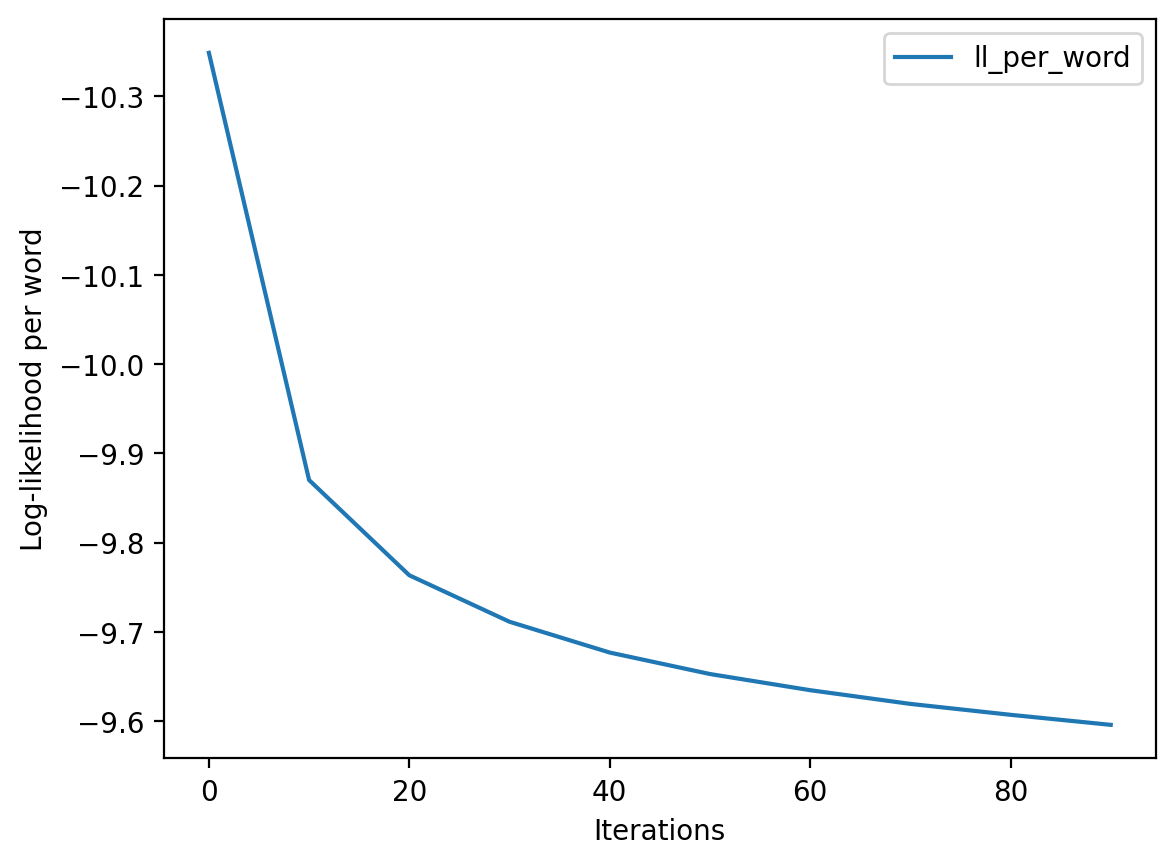

In [6]:
lda.train()

In [7]:
lda.load(batch_num=0)

INFO:hyfi.task.batch:> Loading config for batch_name: model batch_num: 0
INFO:hyfi.task.batch:Loading config from /raid/cis/yjlee/workspace/projects/thematos/workspace/topic/model/configs/model(0)_config.yaml
INFO:hyfi.task.batch:Merging config with the loaded config
INFO:hyfi.task.batch:Updating config with config_kwargs: {}
INFO:hyfi.task.batch:Initalized batch: corpus(3) in /raid/cis/yjlee/workspace/projects/thematos/workspace/topic/corpus
INFO:hyfi.task.batch:Initalized batch: model(0) in /raid/cis/yjlee/workspace/projects/thematos/workspace/topic/model
INFO:hyfi.utils.iolibs:Processing [1] files from ['/raid/cis/yjlee/workspace/projects/thematos/workspace/topic/model/outputs/LDA_model(0)_k(10)-ll_per_word.csv']
INFO:hyfi.utils.datasets.load:Loading data from /raid/cis/yjlee/workspace/projects/thematos/workspace/topic/model/outputs/LDA_model(0)_k(10)-ll_per_word.csv
INFO:hyfi.utils.datasets.load: >> elapsed time to load data: 0:00:00.009451
INFO:hyfi.utils.iolibs:Processing [1] fil

In [8]:
lda.model_id


'LDA_model(0)_k(10)'

In [10]:
lda.topic_dists[:1]


[array([1.20822549e-01, 6.82815909e-01, 1.41164142e-04, 9.92507711e-02,
        1.03789695e-04, 1.23214879e-04, 6.25280954e-05, 1.23996026e-04,
        1.05456173e-04, 9.64503437e-02], dtype=float32)]